In [2]:
#

import numpy as np
import scipy.stats as ss
import pandas as pd

np.random.seed(seed=0)
areas_premium = ss.norm(200, 50).rvs(1000)
areas_non_premium = ss.norm(500, 50).rvs(1000)
df_premium, df_non_premium = pd.DataFrame(), pd.DataFrame()

df_premium['area'] = areas_premium
df_premium['premium'] = 1
df_non_premium['area'] = areas_non_premium
df_non_premium['premium'] = 0
df = pd.concat([df_premium, df_non_premium])
df

,area,premium
0,288.202617,1
1,220.007860,1
2,248.936899,1
3,312.044660,1
4,293.377900,1
...,...,...
995,504.887540,0
996,570.076171,0
997,507.921692,0
998,442.904929,0


In [12]:
df['area']

0      288.202617
1      220.007860
2      248.936899
3      312.044660
4      293.377900
          ...    
995    504.887540
996    570.076171
997    507.921692
998    442.904929
999    434.451481
Name: area, Length: 2000, dtype: float64

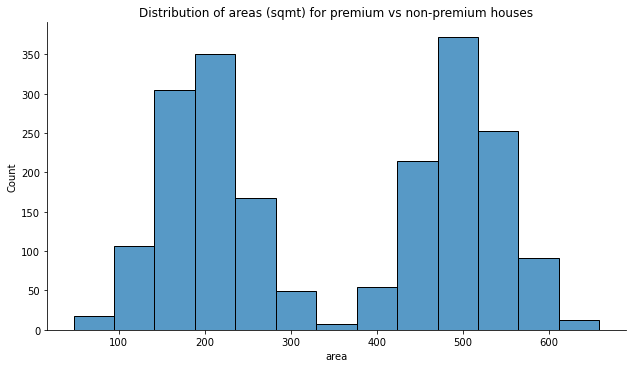

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
#x='area', hue='premium',
sns.displot(df['area'], height=5, aspect=16/9)
plt.title('Distribution of areas (sqmt) for premium vs non-premium houses')
plt.show()


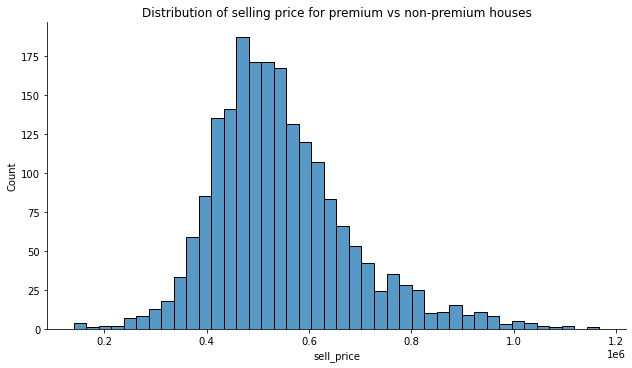

In [4]:
df['true_value'] = (df['area'] * (1000 + (2000 * df['premium'])))
# Add selling price = true value x noise
# Noise is a random value between 80% and 120%
np.random.seed(seed=0)
df['sell_price'] = df['true_value'] * (
    np.random.randint(low=80, high=121, size=2000) / 100)
# Visualize distributions of selling price
#x='sell_price', hue='premium',
sns.displot(df['sell_price'], height=5, aspect=16/9)
plt.title('Distribution of selling price for premium vs non-premium houses')
plt.show()

In [23]:
df.index.is_unique
df.index.duplicated()
df = df.loc[~df.index.duplicated(), :]

In [5]:
import statsmodels.api as sm

df['area_x_premium'] = df['area'] * df['premium']
# Statsmodel implementation

y = df['true_value']
X = df[['area', 'area_x_premium']]
model = sm.OLS(y, X)
results = model.fit().summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             true_value   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.942e+33
Date:                Fri, 02 Sep 2022   Prob (F-statistic):                        0.00
Time:                        17:30:11   Log-Likelihood:                          41368.
No. Observations:                2000   AIC:                                 -8.273e+04
Df Residuals:                    1998   BIC:                                 -8.272e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
area            1000.0000   1.58e-14   6.32e+16      0.000    1000.000    1000.000
area_x_premium  2000.0000   4.22e-14   4.74e+16      0.000    2000.000    2000.000
==============================================================================
Omnibus:                       50.232   Durbin-Watson:                   0.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.111
Skew:                          -0.313   Prob(JB):                     1.60e-10
Kurtosis:                       2.614   Cond. No.                         2.94
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
y = df['sell_price']
model = sm.OLS(y, X)
results = model.fit().summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             sell_price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          7.076e+04
Date:                Fri, 02 Sep 2022   Prob (F-statistic):                        0.00
Time:                        17:31:45   Log-Likelihood:                         -25047.
No. Observations:                2000   AIC:                                  5.010e+04
Df Residuals:                    1998   BIC:                                  5.011e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
area            1000.4102      4.181    239.294      0.000     992.211    1008.609
area_x_premium  1994.9317     11.133    179.186      0.000    1973.098    2016.766
==============================================================================
Omnibus:                      150.624   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.733
Skew:                           0.021   Prob(JB):                     9.63e-12
Kurtosis:                       2.221   Cond. No.                         2.94
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# Increase noise on target variable to +/- 50% of true value
np.random.seed(seed=0)
df['sell_price_extreme_noise'] = df['true_value'] * (
    np.random.randint(low=50, high=151, size=2000) / 100)
y = df['sell_price_extreme_noise']
model = sm.OLS(y, X)
results = model.fit().summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     sell_price_extreme_noise   R-squared (uncentered):                   0.921
Model:                                  OLS   Adj. R-squared (uncentered):              0.921
Method:                       Least Squares   F-statistic:                          1.162e+04
Date:                      Fri, 02 Sep 2022   Prob (F-statistic):                        0.00
Time:                              17:32:48   Log-Likelihood:                         -26860.
No. Observations:                      2000   AIC:                                  5.372e+04
Df Residuals:                          1998   BIC:                                  5.374e+04
Df Model:                                 2                                                  
Covariance Type:                  nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
area            1002.5096     10.352     96.841      0.000     982.208    1022.812
area_x_premium  2005.2614     27.568     72.739      0.000    1951.196    2059.326
==============================================================================
Omnibus:                      253.170   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.993
Skew:                          -0.025   Prob(JB):                     4.68e-15
Kurtosis:                       2.112   Cond. No.                         2.94
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
data = sm.datasets.spector.load_pandas()
exog = data.exog
endog = data.endog
print(sm.datasets.spector.NOTE)
print(data.exog)
print("--------")
print(data.endog)


::

    Number of Observations - 32

    Number of Variables - 4

    Variable name definitions::

        Grade - binary variable indicating whether or not a student's grade
                improved.  1 indicates an improvement.
        TUCE  - Test score on economics test
        PSI   - participation in program
        GPA   - Student's grade point average

     GPA  TUCE  PSI
0   2.66  20.0  0.0
1   2.89  22.0  0.0
2   3.28  24.0  0.0
3   2.92  12.0  0.0
4   4.00  21.0  0.0
5   2.86  17.0  0.0
6   2.76  17.0  0.0
7   2.87  21.0  0.0
8   3.03  25.0  0.0
9   3.92  29.0  0.0
10  2.63  20.0  0.0
11  3.32  23.0  0.0
12  3.57  23.0  0.0
13  3.26  25.0  0.0
14  3.53  26.0  0.0
15  2.74  19.0  0.0
16  2.75  25.0  0.0
17  2.83  19.0  0.0
18  3.12  23.0  1.0
19  3.16  25.0  1.0
20  2.06  22.0  1.0
21  3.62  28.0  1.0
22  2.89  14.0  1.0
23  3.51  26.0  1.0
24  3.54  24.0  1.0
25  2.83  27.0  1.0
26  3.39  17.0  1.0
27  2.67  24.0  1.0
28  3.65  21.0  1.0
29  4.00  23.0  1.0
30  3.10  21.0  1

In [13]:
exog = sm.add_constant(exog, prepend=True)
class MyProbit(GenericLikelihoodModel):
    def loglike(self, params):
        exog = self.exog
        endog = self.endog
        q = 2 * endog - 1
        return stats.norm.logcdf(q*np.dot(exog, params)).sum()
sm_probit_manual = MyProbit(endog, exog).fit()
print(sm_probit_manual.summary())

Optimization terminated successfully.
         Current function value: 0.400588
         Iterations: 292
         Function evaluations: 494
                               MyProbit Results                               
Dep. Variable:                  GRADE   Log-Likelihood:                -12.819
Model:                       MyProbit   AIC:                             33.64
Method:            Maximum Likelihood   BIC:                             39.50
Date:                Fri, 02 Sep 2022                                         
Time:                        17:49:10                                         
No. Observations:                  32                                         
Df Residuals:                      28                                         
Df Model:                           3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

In [17]:
#OLS from https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import statsmodels.api as sm
print("sys.path:",sys.path)
np.random.seed(9876789)
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x ** 2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)
X = sm.add_constant(X)
y = np.dot(X, beta) + e
model = sm.OLS(y, X)
results = model.fit()
print(type(results))
print(results.summary())

sys.path: ['/Users/dougchang/Documents/GitHub/test_stuff/test_postgres', '/Users/dougchang/miniconda3/envs/cosmic/lib/python39.zip', '/Users/dougchang/miniconda3/envs/cosmic/lib/python3.9', '/Users/dougchang/miniconda3/envs/cosmic/lib/python3.9/lib-dynload', '', '/Users/dougchang/miniconda3/envs/cosmic/lib/python3.9/site-packages']
<class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          2.83e-239
Time:                        13:11:02   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BI